In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 

In [2]:
df_train=pd.read_csv("train.csv")
df_train.info()
#df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df_test=pd.read_csv("test.csv")
df_test.info()
#df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
df_train['Embarked']=df_train['Embarked'].map({'S':1, 'C':2,'Q':3})

In [5]:
df_test['Embarked']=df_test['Embarked'].map({'S':1, 'C':2,'Q':3})

In [6]:
df_train['Sex']= df_train['Sex'].map({'female': 1, 'male': 0})

In [7]:
df_test['Sex']= df_test['Sex'].map({'female': 1, 'male': 0})

In [18]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [80]:
df_train_check=df_train.iloc[:,(0,1,2,4,6,7,9,11)]
df_test_check=df_test.iloc[:,(0,1,5,6,8,10)]

In [30]:
df_train_check.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,1.0
1,2,1,1,1,1,0,71.2833,2.0
2,3,1,3,1,0,0,7.9250,1.0
3,4,1,1,1,1,0,53.1000,1.0
4,5,0,3,0,0,0,8.0500,1.0


In [81]:
df_test_check.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Embarked
0,892,3,0,0,7.8292,3
1,893,3,1,0,7.0000,1
2,894,2,0,0,9.6875,3
3,895,3,0,0,8.6625,1
4,896,3,1,1,12.2875,1


In [22]:
df_gender_sub = pd.read_csv("gender_submission.csv")
df_gender_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [23]:
df_gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [84]:
df_train_check.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [83]:
df_test_check.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

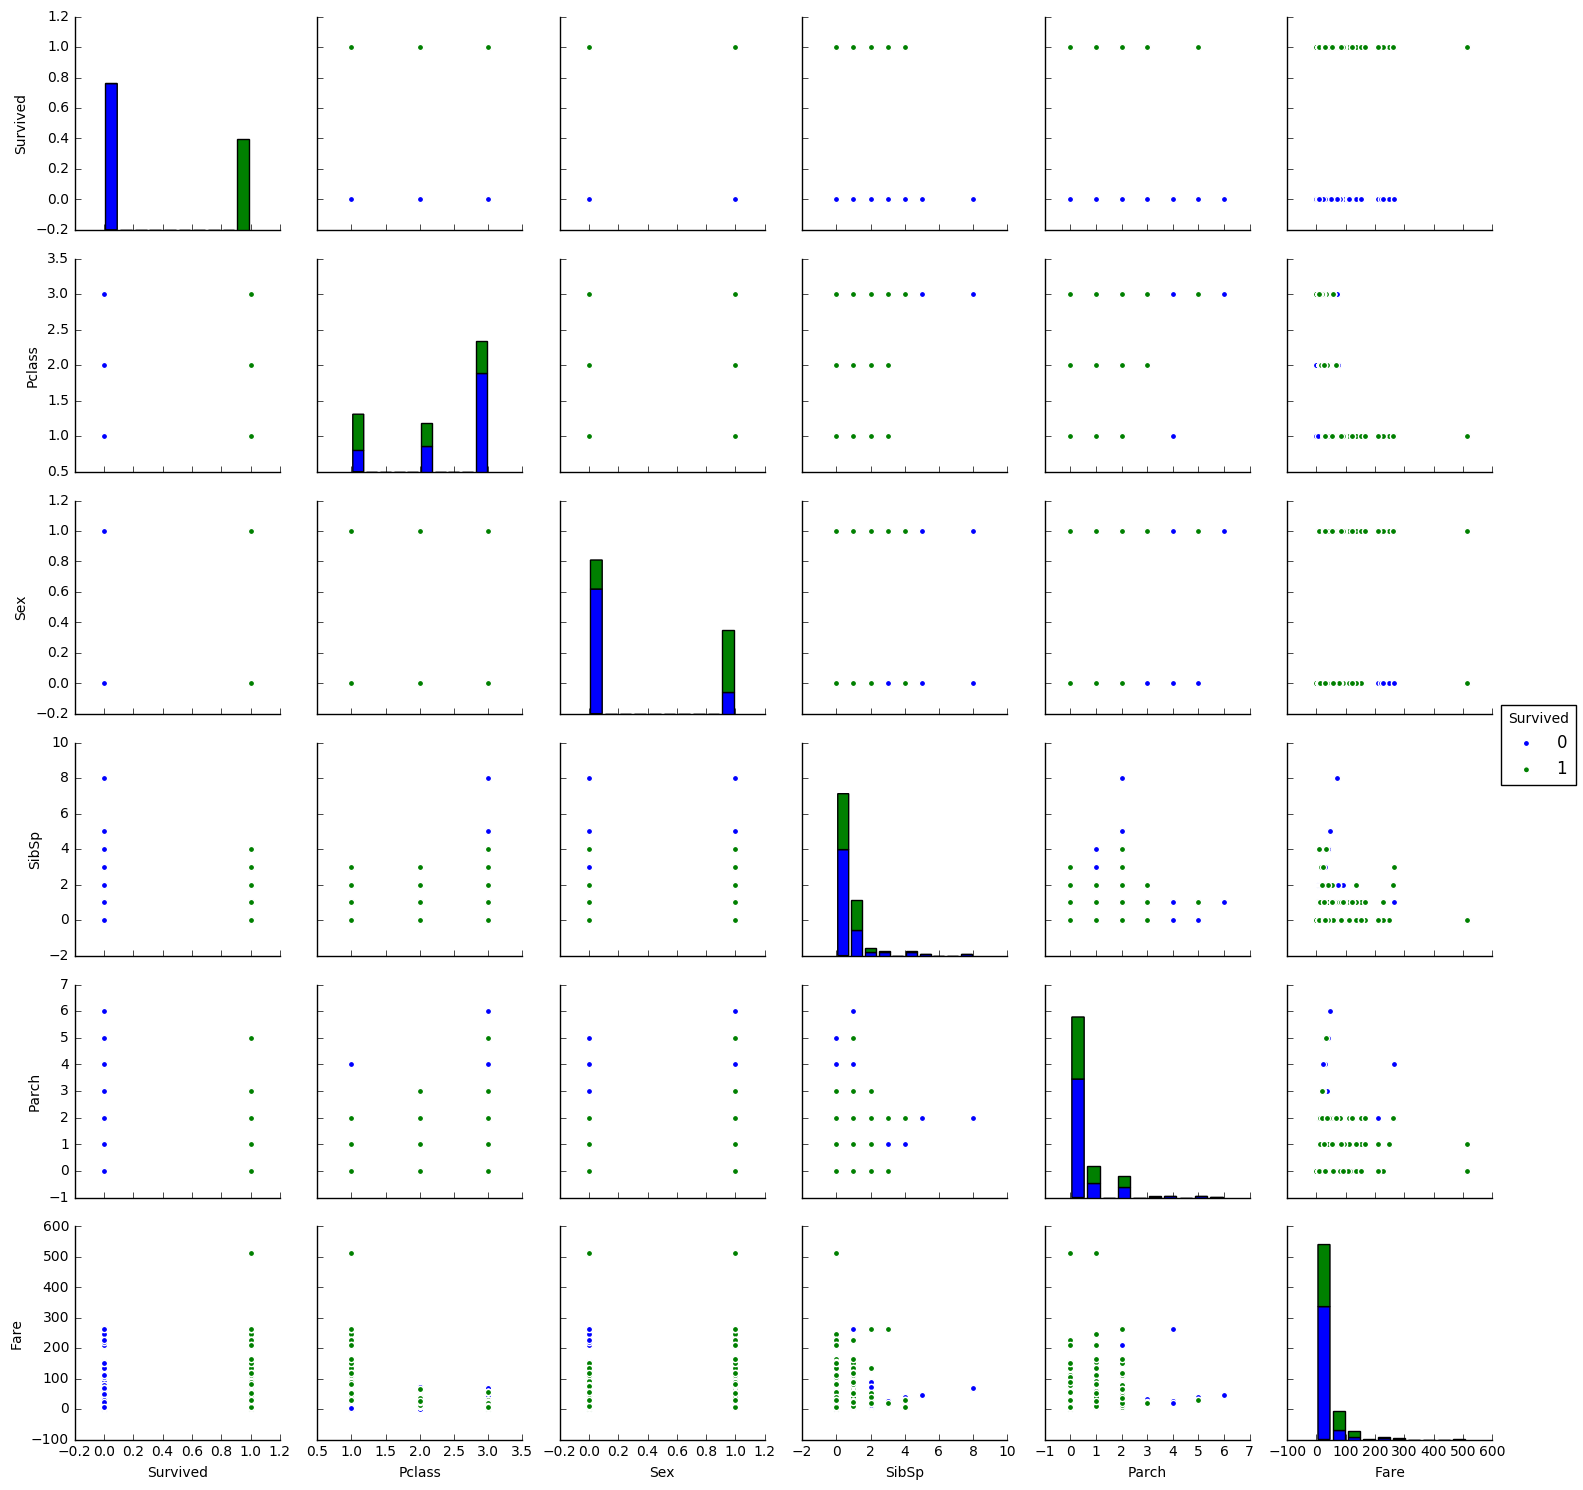

In [32]:
g=sns.pairplot(df_train_check.iloc[:,1:7], hue='Survived')

ValueError: max must be larger than min in range parameter.

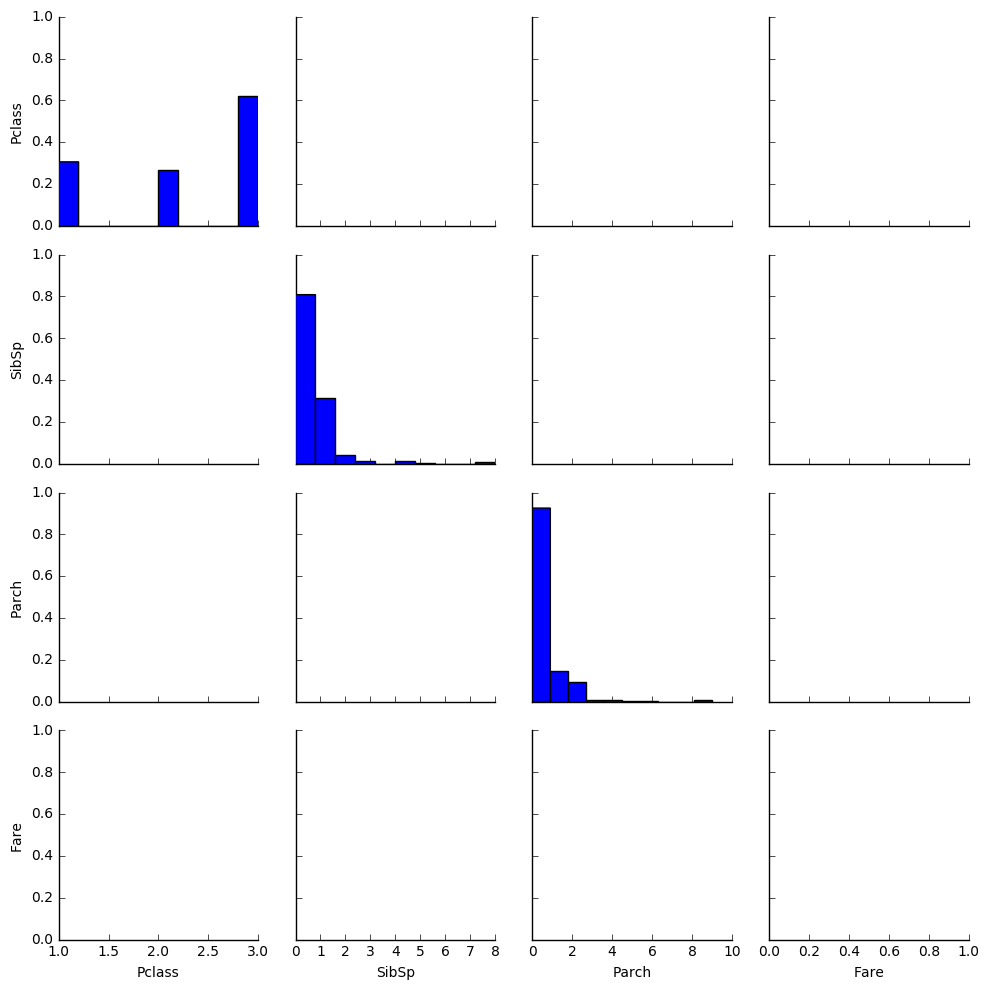

In [85]:
g=sns.pairplot(df_test_check.iloc[:,1:5])

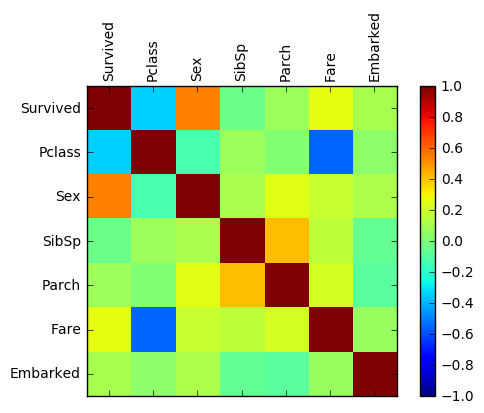

In [41]:
correlations = df_train_check.iloc[:,1:8].corr()
names=['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=90)
plt.show()

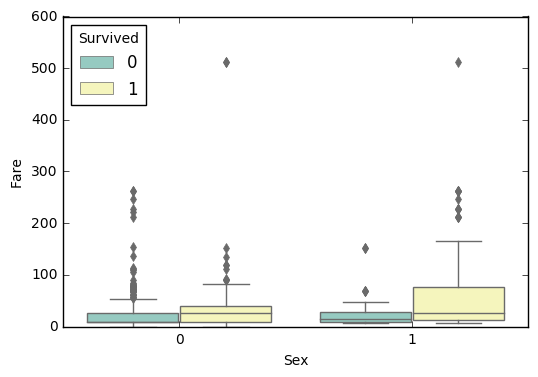

In [42]:
ax = sns.boxplot(x="Sex", y="Fare", hue="Survived",data=df_train_check, palette="Set3")

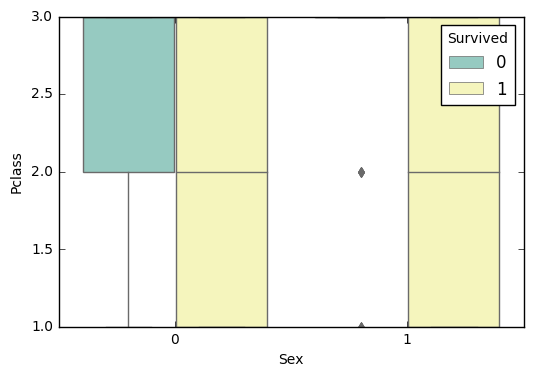

In [43]:
ax = sns.boxplot(x="Sex", y="Pclass", hue="Survived",data=df_train_check, palette="Set3")

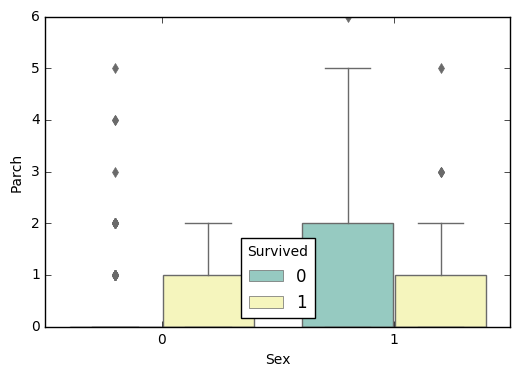

In [44]:
ax = sns.boxplot(x="Sex", y="Parch", hue="Survived",data=df_train_check, palette="Set3")

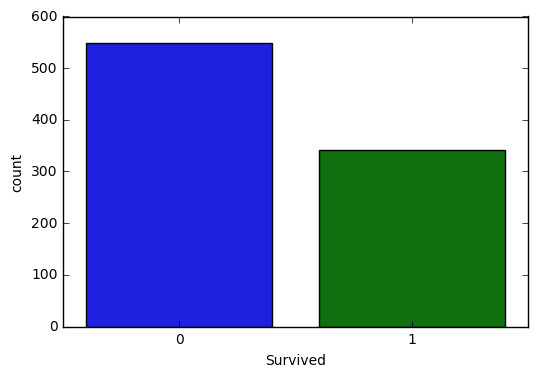

In [45]:
sns.countplot(x='Survived',data=df_train_check)

In [67]:
# Importing modules
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
import random

In [69]:
X=df_train_check.iloc[:,(2,3,6)]
y=df_train_check.iloc[:,1]


random.seed(3)
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

#model = LogisticRegression()
#model = model.fit(X, y)

# check the accuracy on the training set
#model.score(X, y)

[ 0.8         0.77777778  0.7752809   0.84269663  0.7752809   0.76404494
  0.76404494  0.74157303  0.82022472  0.76136364]
0.782228748156


In [53]:
model = DecisionTreeClassifier()
model = model.fit(X, y)
model.score(X, y)

0.90460157126823793

In [72]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.70982143  0.8161435   0.84684685  0.82432432]
0.799284024375
0.0528607524391


In [73]:
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.74107143  0.82959641  0.84234234  0.78828829]
0.80032461794
0.0396173598497


In [75]:
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.73214286  0.8206278   0.8018018   0.77477477]
0.782336809103
0.0332479447006


In [76]:
scores = cross_val_score(GaussianNB(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.76785714  0.78923767  0.76576577  0.78828829]
0.777787216268
0.0110057597678


In [77]:
scores = cross_val_score(SVC(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.70982143  0.80717489  0.8018018   0.78828829]
0.776771601638
0.0392614011478


In [60]:
model = RandomForestClassifier()
model = model.fit(X, y)
model.score(X, y)
print(scores.std())

0.89898989898989901